In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [18]:
p1_data = pd.read_pickle("./hw4_p1.pkl")
p1_data.shape

(3451, 2)

In [19]:
x_vals = p1_data[:,0]
y_vals = p1_data[:,1]

/var/folders/jw/6cygsm496qs9d6kbsmmwmnrc0000gn/T/ipykernel_56709/2574736133.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(p1_data[:, 0], p1_data[:, 1], cmap='viridis', alpha=0.6, label='Data Points')


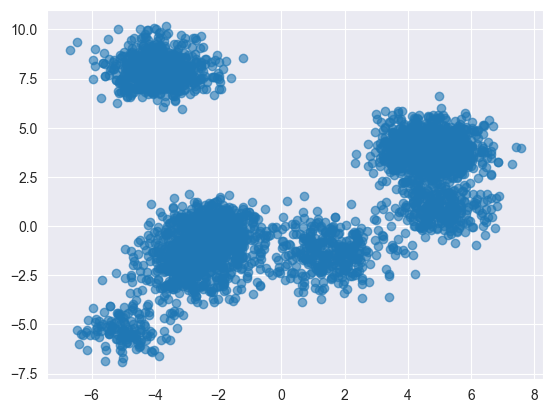

In [62]:
plt.scatter(p1_data[:, 0], p1_data[:, 1], cmap='viridis', alpha=0.6, label='Data Points')

In [23]:
def init_clusters(K):
    mins = p1_data.min(axis=0)
    maxs = p1_data.max(axis=0)
    points = np.random.uniform(low=mins, high=maxs, size=(K,2))
    return points

In [22]:
def distance(x, z):
    N, D = x.shape
    K, _ = z.shape
    distances = np.zeros((N, K))  
    
    for i in range(N):           
        for j in range(K):      
            diff = x[i] - z[j] 
            distances[i, j] = np.linalg.norm(diff)  
    return distances

In [29]:
def assignment(dist):
    return np.argmin(dist, axis=1)

In [90]:
def update_centroids(X, labels, centroids):
    num_centroids, _ = centroids.shape
    new_centroids = []
    for k in range(num_centroids):
        points = X[labels == k]
        if len(points) == 0:
            new_centroids.append(X[np.random.randint(len(X))])
        else:
            new_centroids.append(points.mean(axis=0))
    return np.vstack(new_centroids)

In [119]:
def cluster_knn(X, num_clusters):
    tol = 1e-4
    k = init_clusters(num_clusters)
    iter_wss = []
    convergence = False
    while not convergence:
        dists = distance(X, k)
        labels = assignment(dists)
        new_k = update_centroids(X, labels, k) 
        
        if np.allclose(k, new_k, atol=tol):   
            convergence = True
        k = new_k
        iter_wss.append(calc_wss(X, labels, k))
        
    return k, labels,iter_wss 
        

In [120]:
def calc_wss(X, labels, centroids):
    wss = 0.0
    for k in range(centroids.shape[0]):
        points = X[labels == k]
        wss += np.sum((points - centroids[k])**2)
    return wss

In [121]:
k, labels, iter_wss = cluster_knn(p1_data, 2)
iter_wss

[np.float64(66790.0119598663),
 np.float64(60127.20031712571),
 np.float64(58134.275430298774),
 np.float64(57332.60262250992),
 np.float64(57301.704491697004),
 np.float64(57301.704491697004)]

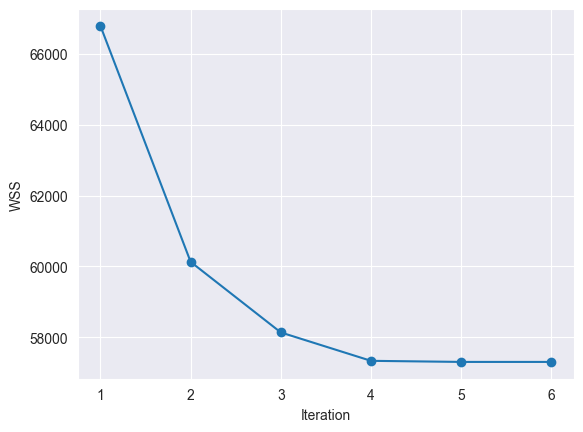

In [125]:
x_values = list(range(1, len(iter_wss) + 1))

plt.plot(x_values, iter_wss, marker='o')
plt.xlabel("Iteration")
plt.ylabel("WSS")
plt.xticks(x_values)
plt.grid(True)
plt.show()

In [126]:
elbow =[]
for i in range(1,10):
    k, labels, _ = cluster_knn(p1_data, i)
    wss = calc_wss(p1_data, labels, k)
    elbow.append(wss)
elbow

[np.float64(103136.47501472464),
 np.float64(57301.704491697004),
 np.float64(14992.552088320817),
 np.float64(10255.337527266836),
 np.float64(8224.32865382963),
 np.float64(6848.054176547172),
 np.float64(4814.252296845211),
 np.float64(3699.4900153583053),
 np.float64(3637.2857480753073)]

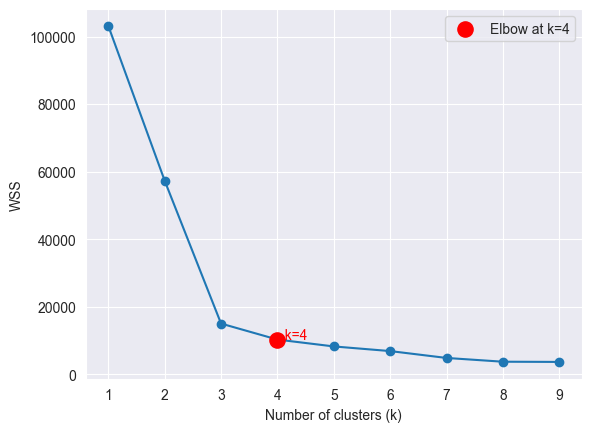

In [127]:
x_values = list(range(1, len(elbow) + 1))

plt.plot(x_values, elbow, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WSS")

k_elbow = 4
wss_elbow = elbow[k_elbow - 1]  

plt.scatter(k_elbow, wss_elbow, color='red', s=120, zorder=3, label=f'Elbow at k={k_elbow}')
plt.text(k_elbow, wss_elbow, f"  k={k_elbow}", color='red')

plt.xticks(x_values)  
plt.legend()
plt.grid(True)
plt.show()

In [129]:
k, labels, _ = cluster_knn(p1_data, 4)

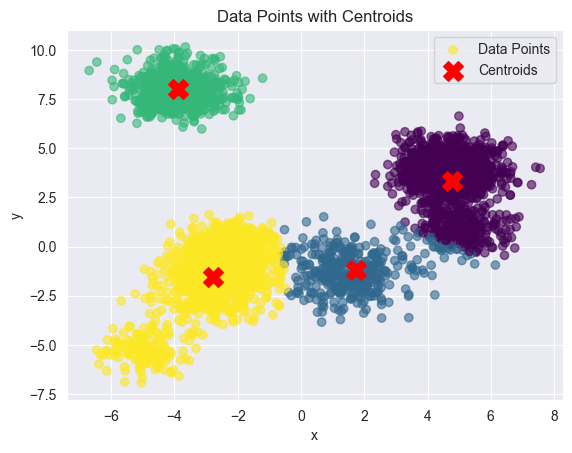

In [130]:
plt.scatter(p1_data[:, 0], p1_data[:, 1], c=labels, cmap='viridis', alpha=0.6, label='Data Points')

plt.scatter(k[:, 0], k[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title("Data Points with Centroids")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

In [131]:
def calc_silhouette(X, labels, centroids):
    N = X.shape[0]
    K = centroids.shape[0]
    silhouettes = []

    for i in range(N):
        xi = X[i]
        ci = labels[i]
        
        same_cluster = X[labels == ci]
        if len(same_cluster) > 1:
            a = np.mean([np.linalg.norm(xi - p) for p in same_cluster if not np.array_equal(p, xi)])
        else:
            a = 0  

        b = np.inf
        for k in range(K):
            if k == ci:
                continue
            other_cluster = X[labels == k]
            if len(other_cluster) > 0:
                dist = np.mean([np.linalg.norm(xi - p) for p in other_cluster])
                b = min(b, dist)

        if max(a, b) == 0:
            silhouettes.append(0)
        else:
            silhouettes.append((b - a) / max(a, b))
    return np.mean(silhouettes)

In [133]:
calc_silhouette(p1_data, labels, k)

np.float64(0.6128106513241159)

In [134]:
s_scores =[]
for i in range(1,10):
    k, labels, _ = cluster_knn(p1_data, i)
    s = calc_silhouette(p1_data, labels, k)
    s_scores.append(s)
s_scores

/var/folders/jw/6cygsm496qs9d6kbsmmwmnrc0000gn/T/ipykernel_56709/1198735175.py:28: RuntimeWarning: invalid value encountered in scalar divide
  silhouettes.append((b - a) / max(a, b))


[np.float64(nan),
 np.float64(0.48249544600219996),
 np.float64(0.6979536004537619),
 np.float64(0.5951200591681681),
 np.float64(0.6233703515511063),
 np.float64(0.5925197965202162),
 np.float64(0.40391962319082536),
 np.float64(0.4987019632052411),
 np.float64(0.3853143448469076)]

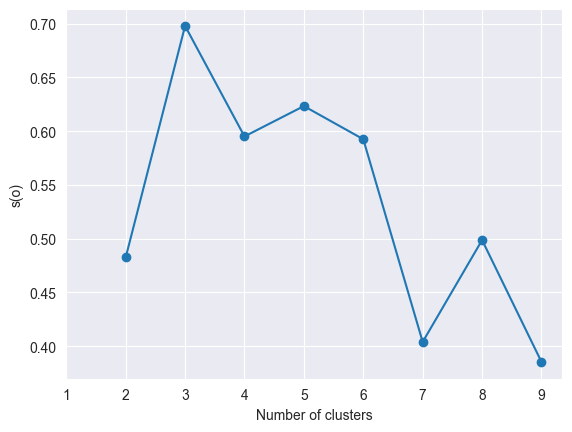

In [135]:
x_values = list(range(1, len(s_scores) + 1))

plt.plot(x_values, s_scores, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("s(o)")
plt.xticks(x_values)
plt.grid(True)
plt.show()